Question 1) Animate bivariate normal distribution.



We will start our code sessions with importing the necessary modules.

In [26]:
%matplotlib inline  
%config InlineBackend.figure_format = 'retina' #Use %config InlineBackend. figure_format = 'retina' after %matplotlib inline to render higher resolution images.

import numpy as np #library consisting of multidimensional array objects and a collection of routines for processing those arrays
import seaborn as sns #Seaborn is a library for making statistical graphics in Python. 
import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import tensorflow as tf # used to create Deep Learning models directly or by using wrapper libraries that simplify the process built on top of TensorFlow
import tensorflow_probability as tfp # probabilistic reasoning and statistical analysis in TensorFlow.
from matplotlib.gridspec import GridSpec #A grid layout to place subplots within a figure. 
from mpl_toolkits.axes_grid1 import make_axes_locatable  #to ease the layout of axes displaying images with a fixed aspect ratio while satisfying additional constraint
from mpl_toolkits.mplot3d import Axes3D #t takes a different kind of axis in order to actually graph something in three dimension
from mpl_toolkits.mplot3d.art3d import Poly3DCollection #A collection of 3D polygons. Create a Poly3DCollection. verts should contain 3D coordinates

tfd, tfb = tfp.distributions, tfp.bijectors

rc = {
    'font.family': ['sans-serif'],
    'font.sans-serif': ['Open Sans', 'Arial Unicode MS'],
    'font.size': 12,
    'figure.figsize': (8, 6),
    'grid.linewidth': 0.5,
    'legend.fontsize': 10,
    'legend.frameon': True,
    'legend.framealpha': 0.6,
    'legend.handletextpad': 0.2,
    'lines.linewidth': 1,
    'axes.facecolor': '#fafafa',
    'axes.labelsize': 11,
    'axes.titlesize': 14,
    'axes.linewidth': 0.5,
    'xtick.labelsize': 11,
    'xtick.major.width': 0.5,
    'ytick.labelsize': 11,
    'ytick.major.width': 0.5,
    'figure.titlesize': 14,
}
sns.set('notebook', 'whitegrid', rc=rc)

After importing the modules  I have also defined the font , figure, legend and axes.

Now here I am defining the mean by using numpy module and also the covariance matrix by numpy. 

In [25]:
mean = np.array([0., 0.])
cov = np.array([[1.0,0.7],[0.7,1.]])
nd = tfd.MultivariateNormalTriL(loc=mean, scale_tril=tf.linalg.cholesky(cov))
nx, ny = tfd.Normal(mean[0], cov[1, 1]), tfd.Normal(mean[1], cov[0, 0])

x, y = np.linspace(-3,3,100), np.linspace(-3,3,100)
X1, X2 = np.meshgrid(x, y)
Z = nd.prob(np.dstack((X1, X2)))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


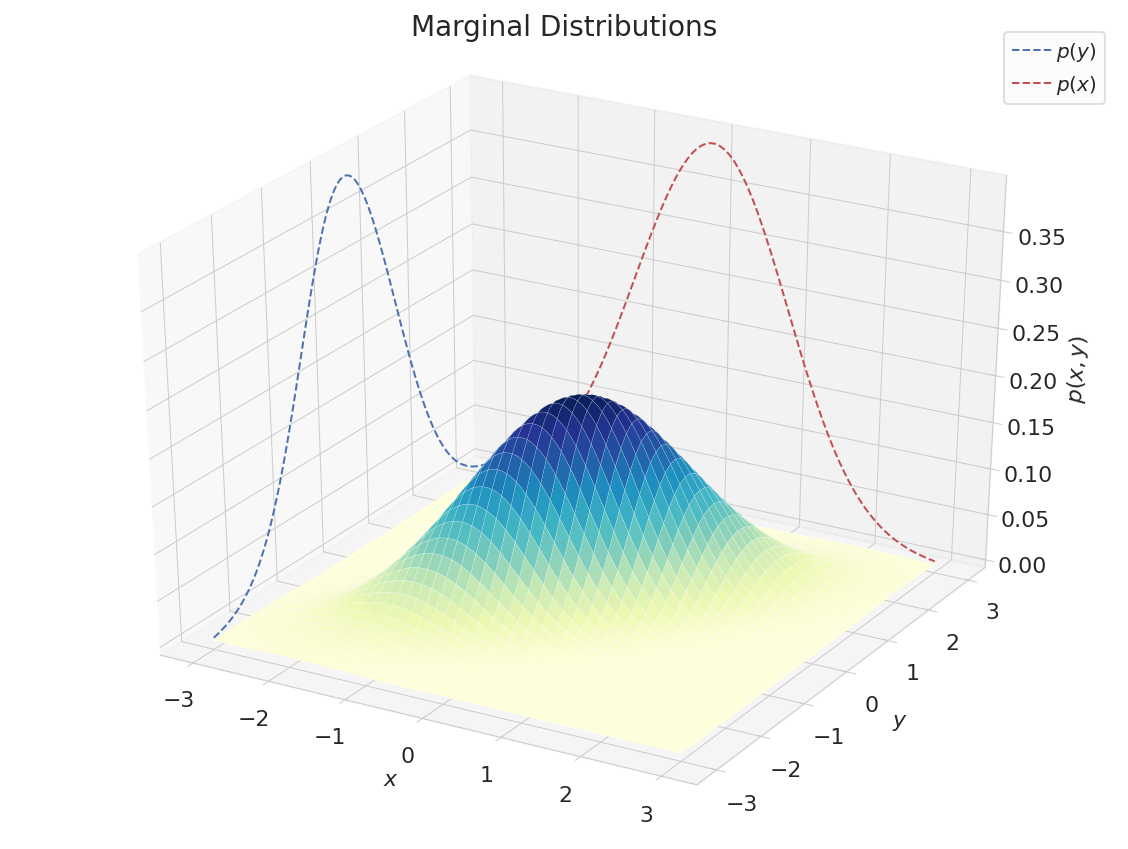

In [21]:
x1, y1, z1 = np.repeat(-3, 100), y, ny.prob(y).numpy()
x2, y2, z2 = x, np.repeat(3, 100), nx.prob(x).numpy()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X1, X2, Z, rstride=2, cstride=2, linewidth=0.1, antialiased=True, cmap='YlGnBu')
ax.plot(x1, y1, z1, 'b--',zorder=-1, label='$p(y)$')
ax.plot(x2, y2, z2, 'r--',zorder=-1, label='$p(x)$')
ax.legend()

ax.tick_params(color='0.8')
ax.set(xlabel='$x$',ylabel="$y$",zlabel="$p(x,y)$",fc='none')
    
fig.suptitle("Marginal Distributions")

plt.tight_layout()
plt.show()

I have produced the figure showing samples from bivariate normal with marginal PDFs  by using matplotlib . I haven't used JAX because I haven't learned it yet . But I have started learning it .